In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter



In [ ]:
# Load the Excel file
file_path = '/Users/antumanipadam/Python/Green_skills/GSsourceexcel.xlsx'

# Read the data from the Excel file
sheet1_data = pd.read_excel(file_path, sheet_name='Sheet1')
sheet2_data = pd.read_excel(file_path, sheet_name='Sheet2')



In [ ]:
# 1. Plotting Job Distribution by Country and Industry
def plot_job_distribution(data):
    # Count the number of jobs in each country and industry
    country_distribution = data['Country'].value_counts()
    industry_distribution = data['Industry'].value_counts()

    # Create subplots for country and industry distributions
    plt.figure(figsize=(15, 6))

    # Plot for country distribution
    plt.subplot(1, 2, 1)
    sns.barplot(x=country_distribution.index, y=country_distribution.values)
    plt.title('Job Distribution by Country')
    plt.xticks(rotation=45)
    plt.xlabel('Country')
    plt.ylabel('Number of Jobs')

    # Plot for industry distribution
    plt.subplot(1, 2, 2)
    sns.barplot(x=industry_distribution.index, y=industry_distribution.values)
    plt.title('Job Distribution by Industry')
    plt.xticks(rotation=45)
    plt.xlabel('Industry')
    plt.ylabel('Number of Jobs')

    plt.tight_layout()
    plt.show()



In [ ]:
# 2. Analyzing Top Skills Required
def plot_top_skills(data, top_n=10):
    # Extract skills from the data
    skill_columns = [col for col in data.columns if 'Skill' in col and 'cluster' not in col]
    aggregated_skills = data[skill_columns].values.flatten()

    # Count the occurrence of each skill and sort them
    skill_counts = Counter(aggregated_skills)
    skill_counts_df = pd.DataFrame(skill_counts.most_common(), columns=['Skill', 'Count'])

    # Select the top N skills for visualization
    top_skills = skill_counts_df.head(top_n)

    # Plot the top N skills
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Count', y='Skill', data=top_skills)
    plt.title(f'Top {top_n} Skills in Green Jobs')
    plt.xlabel('Count')
    plt.ylabel('Skill')
    plt.show()

    return top_skills



In [ ]:
# 3. Detailed Skill Analysis by Category
def detailed_skill_analysis(data, column='Industry'):
    # Extract skills and group them by the specified category (e.g., Industry)
    skill_columns = [col for col in data.columns if 'Skill' in col and 'cluster' not in col]
    detailed_skills = data.set_index(column)[skill_columns].stack().reset_index(name='Skill')
    detailed_skills = detailed_skills[detailed_skills['Skill'].notna()]

    # Visualize the distribution of skills by the specified category
    plt.figure(figsize=(15, 6))
    sns.countplot(y='Skill', hue=column, data=detailed_skills, order=detailed_skills['Skill'].value_counts().iloc[:10].index)
    plt.title(f'Skill Distribution by {column}')
    plt.xlabel('Count')
    plt.ylabel('Skill')
    plt.show()



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

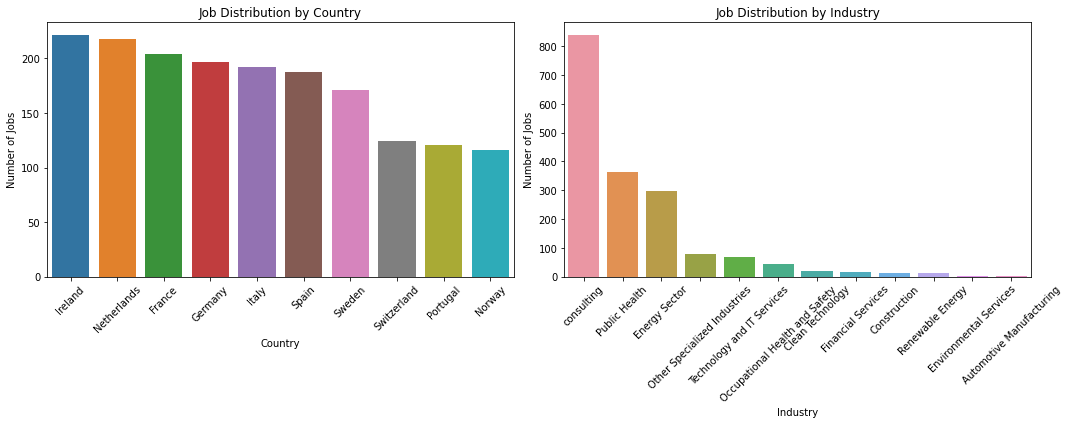

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


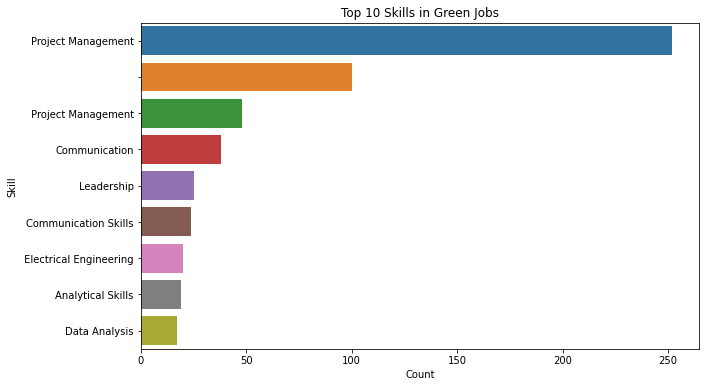

NameError: name 'detailed_skill_analysis' is not defined

In [8]:
# 4. Correlation Analysis between Variables
def correlation_analysis(data):
    # Convert categorical data to numerical values for correlation analysis
    data_numeric = pd.get_dummies(data)
    correlation_matrix = data_numeric.corr()

    # Visualize the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

# Running the analysis
plot_job_distribution(sheet1_data)
top_skills = plot_top_skills(sheet1_data)
detailed_skill_analysis(sheet1_data, 'Industry')
detailed_skill_analysis(sheet1_data, 'Country')
correlation_analysis(sheet1_data)
